In [11]:
import backtrader as bt
import yfinance as yf

class LongShortStrategy(bt.Strategy):
    params = (
        ('long_stocks', ['AAPL', 'MSFT']),  # List of stocks to long
        ('short_stocks', ['GOOGL', 'AMZN']),  # List of stocks to short
    )

    def __init__(self):
        self.long_positions = []
        self.short_positions = []

    def start(self):
        # Download historical data for all stocks
        stocks = self.params.long_stocks + self.params.short_stocks
        self.datas = []
        for stock in stocks:
            data = yf.download(stock, start='2022-01-01', end='2023-01-01')
            self.datas.append(bt.feeds.PandasData(dataname=data, name=stock))

    def next(self):
        # Calculate relative strength (ratio of close prices)
        rel_strength = {}
        for long_stock in self.params.long_stocks:
            for short_stock in self.params.short_stocks:
                long_close = self.getdatabyname(long_stock).close[0]
                short_close = self.getdatabyname(short_stock).close[0]
                rel_strength[(long_stock, short_stock)] = long_close / short_close

        # Sort stocks by relative strength in descending order
        sorted_stocks = sorted(rel_strength, key=rel_strength.get, reverse=True)

        # Enter long positions
        for i in range(len(self.params.long_stocks)):
            long_stock, short_stock = sorted_stocks[i]
            long_position = self.buy(data=self.getdatabyname(long_stock))
            self.long_positions.append(long_position)

        # Enter short positions
        for i in range(len(self.params.short_stocks)):
            long_stock, short_stock = sorted_stocks[-(i+1)]
            short_position = self.sell(data=self.getdatabyname(short_stock))
            self.short_positions.append(short_position)

        # Exit positions that are no longer in the portfolio
        for position in self.long_positions[:]:
            if position.data._name not in self.params.long_stocks:
                self.close(position)
                self.long_positions.remove(position)

        for position in self.short_positions[:]:
            if position.data._name not in self.params.short_stocks:
                self.close(position)
                self.short_positions.remove(position)

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(LongShortStrategy)

    cerebro.broker.setcash(100000)  # Set initial capital

    # Add analyzers if desired
    # cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='mysharpe')

    # Add data feeds
    # Example with predefined stocks
    # data = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2022, 1, 1), todate=datetime(2023, 1, 1))
    # cerebro.adddata(data)
    
    # Example with a list of stocks
    stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
    for stock in stocks:
        data = yf.download(stock, start='2022-01-01', end='2023-01-01')
        cerebro.adddata(bt.feeds.PandasData(dataname=data, name=stock))

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00


In [12]:
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name="return")
#cerebro.addanalyzer(BacktraderPlottingLive, address="*", port=8889)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Final Portfolio Value: 100000.00


In [13]:
import quantstats as qs
import pandas as pd

C:\Users\NARENDRA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\NARENDRA\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\NARENDRA\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


                           Strategy
-------------------------  ----------
Start Period               2022-01-03
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             0.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     -
Prob. Sharpe Ratio         -
Smart Sharpe               -
Sortino                    -
Smart Sortino              -
Sortino/√2                 -
Smart Sortino/√2           -
Omega                      -

Max Drawdown               %
Longest DD Days            -
Volatility (ann.)          0.0%
Calmar                     -
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            -
Risk of Ruin               1.0%
Daily Value-at-Risk        -
Expected Shortfall (cVaR)  -

Max Consecutive Wins       0
Max Consecutive Losses     0
Gain/Pain Ratio            -
Gai

None

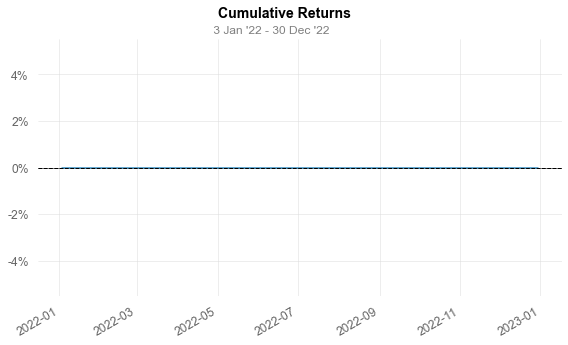

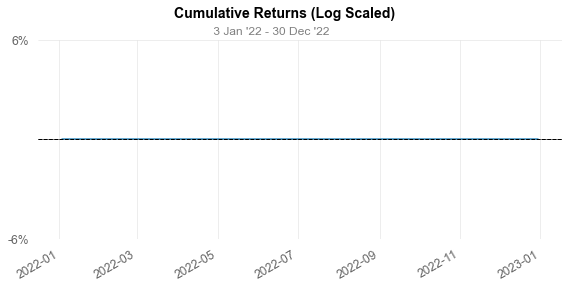

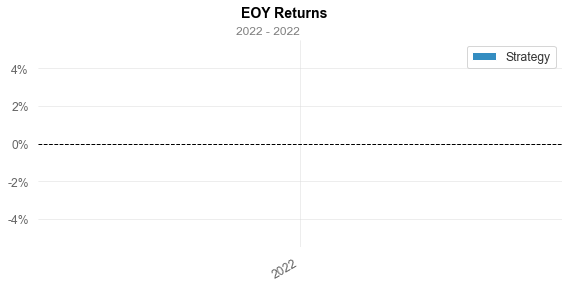

C:\Users\NARENDRA\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


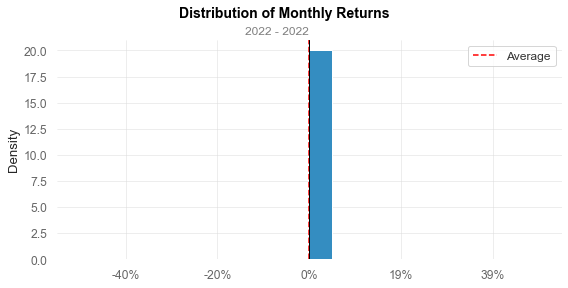

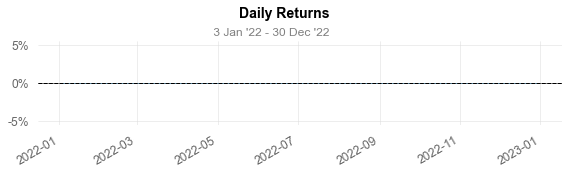

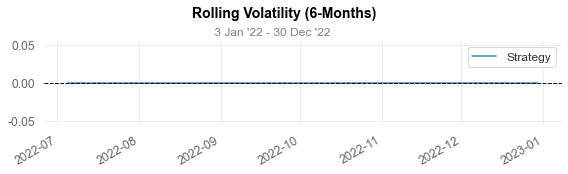

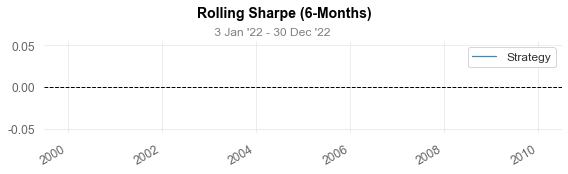

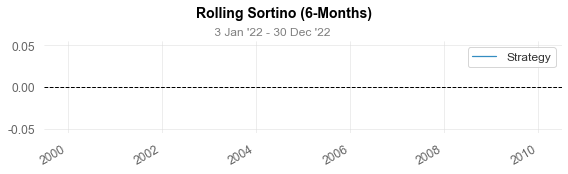

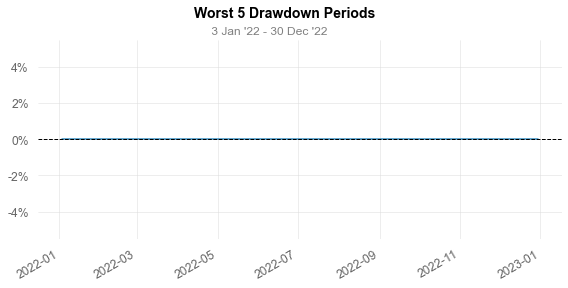

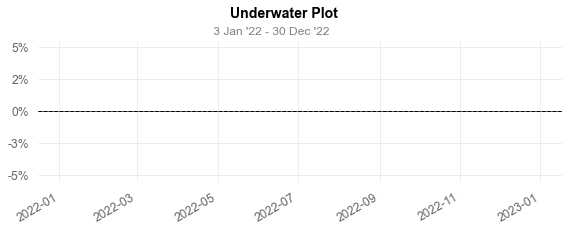

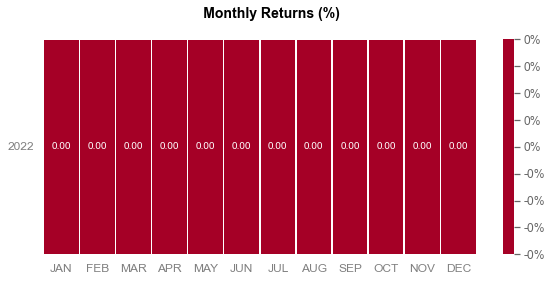

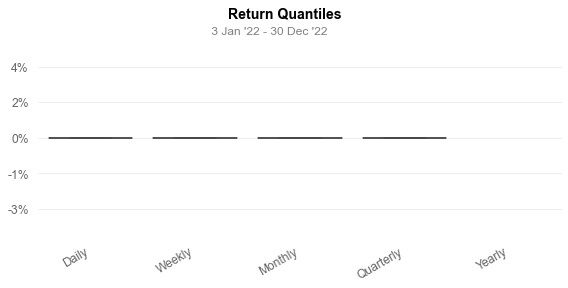

In [14]:
strat_return = strat.analyzers.getbyname("return").get_analysis()
strat_return = list(strat_return.items())
idx, values = zip(*strat_return)
strat_return = pd.Series(values, idx)
qs.reports.full(strat_return)